# Random Walk in 3D
Con questo programma vogliamo simulare e analizzare il comportamento di un Random Walk in 3D

## 1) Simulazione dei RW
Iniziamo il programma importando tutte le librerie necessarie per far funzionare il programma

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation
import time
%matplotlib notebook

Decidiamo il numero di esperimenti che vogliamo effettuare e il numero di steps che deve contenere ciascun esperimento

In [2]:
Nsteps=1000
Nexp=100

Definiamo una funzione `step` che genera uno step del Random Walk, ovvero un passo pari a +-1 su uno dei tre assi.

In [3]:
def step():
    step=np.array([0,0,0])
    axis=np.random.randint(0,3)
    direction=np.random.randint(0,2)
    step[axis]=int(np.where(direction>0,1,-1))
    return step

Generiamo il numero necessario di step e diamo alla matrice le dimensioni volute: (Num Esperim, Num Passi, 3Assi).  

*Nota: Invece di utilizzare il reshape si poteva anche utilizzare una comprehension dentro una comprehension per generare direttamente la matrice con le giuste dimensioni ma si è deciso di non farlo per mantenere il testo più leggibile.*

In [4]:
steps=np.array([step() for i in range(Nexp*Nsteps) ]).reshape(Nexp,Nsteps,3)

A questo punto basta effettuare una somma cumulativa lungo l'asse degli step per ottenere la matrice con tutte le simulazioni dei RW.

In [5]:
walks=steps.cumsum(1)

## 2) Distribuzione della massima distanza
Ci interessa studiare la distribuzione della massima distanza raggiunta dai RW. Iniziamo a calcolare la distanza dall' origine a cui si trova ciascun cammino in ciascun istante della simulazione. Per fare ciò utilizziamo due comprehension una dentro l'altra.

*Nota: Era possibile ottenere lo stesso risultato anche con una sola comprehesion che iterava sui passi di ciascun esperimento utilizzando dopo la funzione reshape().*  
```
distances=np.array([ np.linalg.norm(step) for walks in walk for step in walk]).reshape(Nexp,Nsteps)
```
*Nonostante il risultato ottenuto fosse lo stesso si è deciso di usare le nested comprehension in modo da ottenere il risultato voluto iterando direttamente sulla matrice `walks` invece di dover usare le variabili `Nexp` e  `Nsteps`.*

In [6]:
distances=np.array([ np.array([np.linalg.norm(step) for step in walk]) for walk in walks])

Troviamo la massima distanza raggiunta da ciascun esperimento con la funzione `.amax()`.

In [7]:
max_dist=np.amax(distances,1)

Prepariamo il grafico e lo stampiamo:  
*Nota: E' stata usata la funzione axis.hist() invece che axis.bar() in modo da poter modificare il numero di bin del grafico.*

<IPython.core.display.Javascript object>


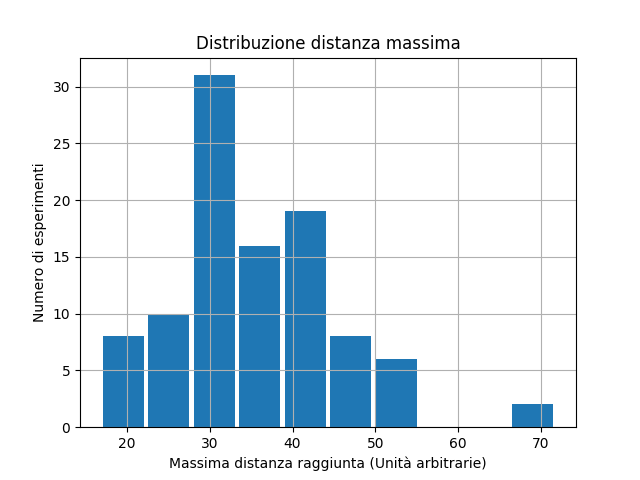

Text(0.5, 1.0, 'Distribuzione distanza massima')

In [8]:
fig0=plt.figure()
axis0=fig0.add_subplot(111)
axis0.hist(max_dist, bins=int(np.sqrt(len(max_dist))), rwidth=0.9 )
axis0.grid(True)
axis0.set_xlabel('Massima distanza raggiunta (Unità arbitrarie)')
axis0.set_ylabel('Numero di esperimenti')
axis0.set_title('Distribuzione distanza massima')

## 3) Dizionario delle particelle con Distanza Finale minore di 10
Vogliamo ora fare un dizionario contenente la posizione finale delle particelle che si sono fermare a una distanza minore di 10 unità dall'origine.  
Per fare ciò utilizziamo una comprehension per ottenere dall'array `walks` una lista contenente solo le posizioni finali dei vari RW. Poi utilizziamo questa lista per creare il dizionario voluto.

In [9]:
FinalPos_List=np.array([ walk[len(walk)-1] for walk in walks ])
LowFinalPos_Dict = { i : FinalPos_List[i] for i in range(len(FinalPos_List)) if np.linalg.norm(FinalPos_List[i])<10 }

## 4) Frazione dei RW con distanza finale minore di 1
Vogliamo ora calcolare in percentuale quanti RW hanno finito la simulazione sull'origine.  
Per fare ciò basta contare quante volte la posizione finale è stata (0,0,0) e dividere per il numero di esperimenti effettuati.

In [10]:
Frac=(FinalPos_List).tolist().count([0,0,0]) /float(len(FinalPos_List))
print('La frazione di RW che sono ritornati sull origine è: %.3f'%Frac)

La frazione di RW che sono ritornati sull origine è: 0.000


## 5) Traiettoria della particella che si ferma più vicina all'origine
Vogliamo ora visualizzare la traiettoria della particella che si è fermata più vicina all'origine.  
*Nota: Nel caso in cui ci siano più particelle ad essere le più vicine all'origine a parità di distanza da essa alla fine della simulazione questo codice stamperà solo una delle traiettorie. In ogni caso la possibilità che dopo 1000 steps vi siano due particelle di questo tipo è praticamente nulla.*  

Dalla lista con le posizioni finali otteniamo dunque la lista con le distanze finali delle varie particelle.

In [11]:
FinDist_List=np.array([walk[len(walk)-1] for walk in distances])

E trovando il minimo di questa lista troviamo la distanza finale minima dei RW.

In [12]:
MinFinDist=np.amin(FinDist_List)

A questo punto ricaviamo un array contenente tutti gli indici delle particelle che hanno distanza finale pari al minimo appena trovato (Quasi sempre questo array conterrà un solo indice).

In [13]:
IndexMinFinDist=np.array([i for i in range(len(FinDist_List)) if FinDist_List[i]==MinFinDist ])

Isoliamo la Traiettoria da Plottare (o la prima di esse `IndexMinFinDist[0]`) e la trasponiamo in modo da poterla plottare.

In [14]:
TrajToPlot=walks[IndexMinFinDist[0]].transpose(1,0)

Prepariamo il grafico e lo plottiamo.

<IPython.core.display.Javascript object>


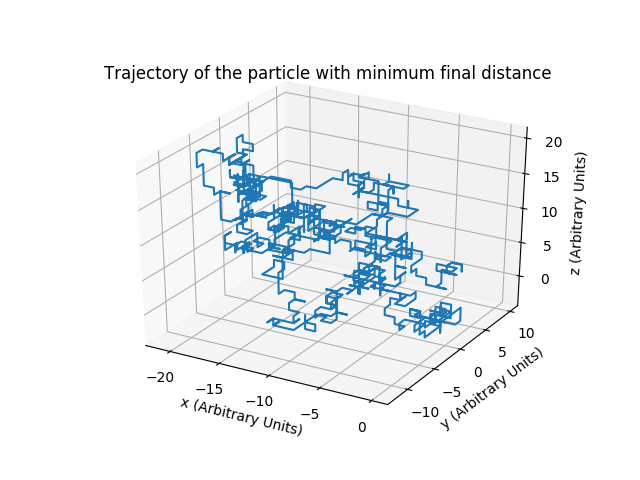

Text(0.5, 0.92, 'Trajectory of the particle with minimum final distance')

In [15]:
fig1=plt.figure()
axis1=fig1.add_subplot(111, projection='3d')
axis1.plot(TrajToPlot[0],TrajToPlot[1],TrajToPlot[2])
axis1.grid(True)
axis1.set_xlabel('x (Arbitrary Units)')
axis1.set_ylabel('y (Arbitrary Units)')
axis1.set_zlabel('z (Arbitrary Units)')
axis1.set_title('Trajectory of the particle with minimum final distance')

## 6) Animazione delle traiettorie che tornano vicine all'origine
Facciamo ora un grafico animato delle traiettorie che tornano vicine all'origine.  
Per fare ciò utilizziamo il dizionario creato in precedenza per ottenere un array con i RW che hanno una piccola distanza finale. Trasponiamo poi l'array in modo da poterlo plottare con più facilità.

In [16]:
LowFinalPos_List=np.array([ walks[i] for i in LowFinalPos_Dict]).transpose(0,2,1)

Prepariamo il grafico:  
Nota:** Per attivare l'animazione bisogna eseguire tutte le celle fino alla funzione FuncAnimation() (presente nell'utltima cella) oppure utilizzare il comando 'Run All Cells'**.

<IPython.core.display.Javascript object>


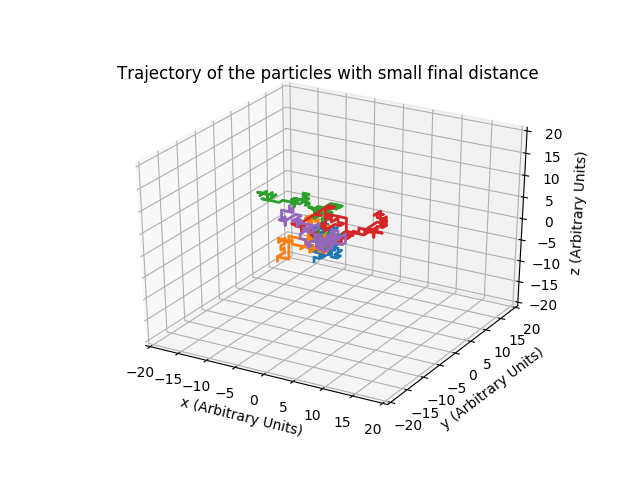

Text(0.5, 0.92, 'Trajectory of the particles with small final distance')

In [17]:
fig2=plt.figure()
axis2=fig2.add_subplot(111, projection='3d', xlim=(-20,20), ylim=(-20,20), zlim=(-20,20))
axis2.grid(True)
axis2.set_xlabel('x (Arbitrary Units)')
axis2.set_ylabel('y (Arbitrary Units)')
axis2.set_zlabel('z (Arbitrary Units)')
axis2.set_title('Trajectory of the particles with small final distance')

Creiamo un array contenete le prime `lines` da plottare, ovvero le posizioni iniziali dei RW.  

*Nota 1: è importante notare che la funzione `axis.plot()` restituisce in output un array contenente un solo oggetto di tipo `Line3D`. Per far si che il nostro array `lines` contenesse una serie di `Line3D` e non una serie di liste contenti ciascuna una singola `Line3D` abbiamo utilizzato all'interno della comprehension `axis.plot()[0]` in modo che il risultato di questo comando fosse di tipo `Line3D` e non `[Line3D]`.*  

*Nota 2: la funzione `axis.plot()` accetta in imput solamente delle list, non degli int. Per questo è stato necessario mettere le parentesi quadre attorno a `walk[0][0]` nel comando `axis.plot( [ esp[0][0] ] )`.*

In [18]:
lines=[ axis2.plot( [walk[0][0]], [walk[1][0]], [walk[2][0]], lw=2)[0] for walk in LowFinalPos_List ]

Definiamo una funzione animate che aggiorna i dati su cui deve essere fatto il grafico. Questa funzione effettua un loop contemporaneamente sui cammini e sulle `lines` da stampare, aggiornando volta per volta i dati contenuti in ciascuna `line`.

In [19]:
def animate(i):
    for exp,line in zip(LowFinalPos_List, lines):
        line.set_data(exp[0][:i],exp[1][:i])
        line.set_3d_properties(exp[2][:i])
    return lines

A questo punto ci basta impostare l'animazione e le traiettorie dell'ultimo grafico si animeranno

In [20]:
ani=animation.FuncAnimation(fig2, animate, repeat=False,  interval=10)